# Tensor Flow Example - Modified for Ancient Greek

The code for this example was taken from
https://keras.io/examples/vision/mnist_convnet/

It uses a convolution neural network to train the model.  I also added a few things to help with visualization of the results.

-John Wallin, MTSU

In [ ]:
# You may need to uncomment the following lines if you aren't running this notebook on Google Colab
# and they aren't installed yet.
!pip install tensorflow
!pip install matplotlib
!pip install matplotlib
!pip install seaborn

In [ ]:
# uncomment if you have problems with your library in colab

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os


In [ ]:
# The code was taken and then modified from the source above to handel user images.

num_images = 2000
epochs = 25
batch_size = 128

# Model / data parameters
num_classes = 3
input_shape = (70, 70, 1)
image_size = (70, 70)
image_folder = 'images'


# Load images from the directory
def load_images_from_folder(folder, image_size, num_images):
    images = []
    labels = []
    class_names = os.listdir(folder)
    for class_name in class_names:
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            image_files = os.listdir(class_folder)[:num_images]
            for image_file in image_files:
                image_path = os.path.join(class_folder, image_file)
                image = keras.preprocessing.image.load_img(image_path, target_size=image_size, color_mode='grayscale')
                image = keras.preprocessing.image.img_to_array(image)
                images.append(image)
                labels.append(class_name)
    return np.array(images), np.array(labels), class_names

# Load images and labels
images, labels, class_names = load_images_from_folder(image_folder, image_size, num_images)

# Encode labels to integers
label_to_index = {label: idx for idx, label in enumerate(np.unique(labels))}
labels = np.array([label_to_index[label] for label in labels])

# Convert labels to categorical
labels = keras.utils.to_categorical(labels, num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print shapes
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
print("class names:", class_names)

x_train shape: (4800, 70, 70, 1)
4800 train samples
1200 test samples
class names: ['Alpha', 'Delta', 'Nu']


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 68, 68, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dropout_2 (Dropout)         (None, 16384)            

In [ ]:
# Now that our model is defined and our data set if prepped, we can train the model.



model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
34/34 [==============================] - 7s 186ms/step - loss: 10.6078 - accuracy: 0.5535 - val_loss: 0.6141 - val_accuracy: 0.7604
Epoch 2/25
34/34 [==============================] - 6s 177ms/step - loss: 0.5323 - accuracy: 0.7963 - val_loss: 0.5880 - val_accuracy: 0.8083
Epoch 3/25
34/34 [==============================] - 6s 174ms/step - loss: 0.4440 - accuracy: 0.8356 - val_loss: 0.4631 - val_accuracy: 0.8500
Epoch 4/25
34/34 [==============================] - 6s 174ms/step - loss: 0.3619 - accuracy: 0.8641 - val_loss: 0.4314 - val_accuracy: 0.8542
Epoch 5/25
34/34 [==============================] - 6s 172ms/step - loss: 0.3393 - accuracy: 0.8734 - val_loss: 0.4630 - val_accuracy: 0.8438
Epoch 6/25
34/34 [==============================] - 6s 176ms/step - loss: 0.3173 - accuracy: 0.8852 - val_loss: 0.4320 - val_accuracy: 0.8542
Epoch 7/25
34/34 [==============================] - 6s 180ms/step - loss: 0.2967 - accuracy: 0.8954 - val_loss: 0.4143 - val_accuracy: 0.8583
Epoch

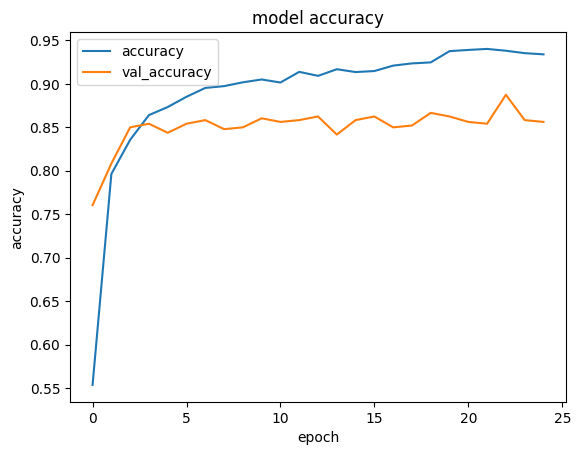

Text(0.5, 1.0, 'Model Loss')

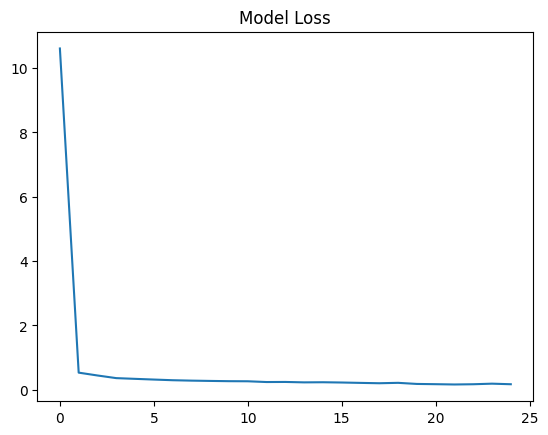

In [ ]:

# we will plot accuracy and validation accuracy

plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Model Loss
plt.plot(history.history['loss'])
plt.title("Model Loss")

In [ ]:
# this is a good way to evaluate the model - look at the test loss and test accuracy

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.47998782992362976
Test accuracy: 0.875


Predicted:  1 Actual:  1
Category  :      0            1            2       
Classnames  :    Alpha      Delta         Nu   
Predicted :  5.918e-02     9.375e-01     3.314e-03    
Actual    :  0.000e+00     1.000e+00     0.000e+00    

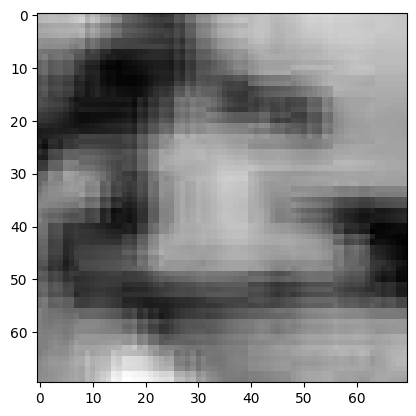

In [ ]:
# we can examine each character to see what the predictions
# and compare it with the actual value and the image.
# For the most part, the predictions and the actual values
# agree.  However, the disagreements are interesting.
# We typically have two types of disagreements.
# 1) the model is wrong because the image is ambiguous.
# 2) the model is wrong because the image is mislabeled.



i= 40
img = x_test[i].reshape(70,70,)
plt.imshow(img, cmap='gray')

xx = model.predict(x_test)
print("Predicted: ", np.argmax(xx[i]), "Actual: ", np.argmax(y_test[i]))


# this block of code prints out the probabilities for each category
# instead of just the simple prediction.  It shows when things
# are ambiguous according to the model instead of just taking the
# top prediction.

print("Category  : ", end="")
for k in range(num_classes):
    print("     %1.1i     " % k, end="  ")
print()

print("Classnames  : ", end="")
for k in range(num_classes):
    print("%8.8s " % class_names[k], end="  ")
print()

print("Predicted : ", end="")
for k in range(num_classes):
    print(" %5.3e  " % xx[i][k], end="  ")
print()

print("Actual    : ", end="")
for k in range(num_classes):
    print(" %5.3e  " % y_test[i][k], end="  ")

(5, 5)


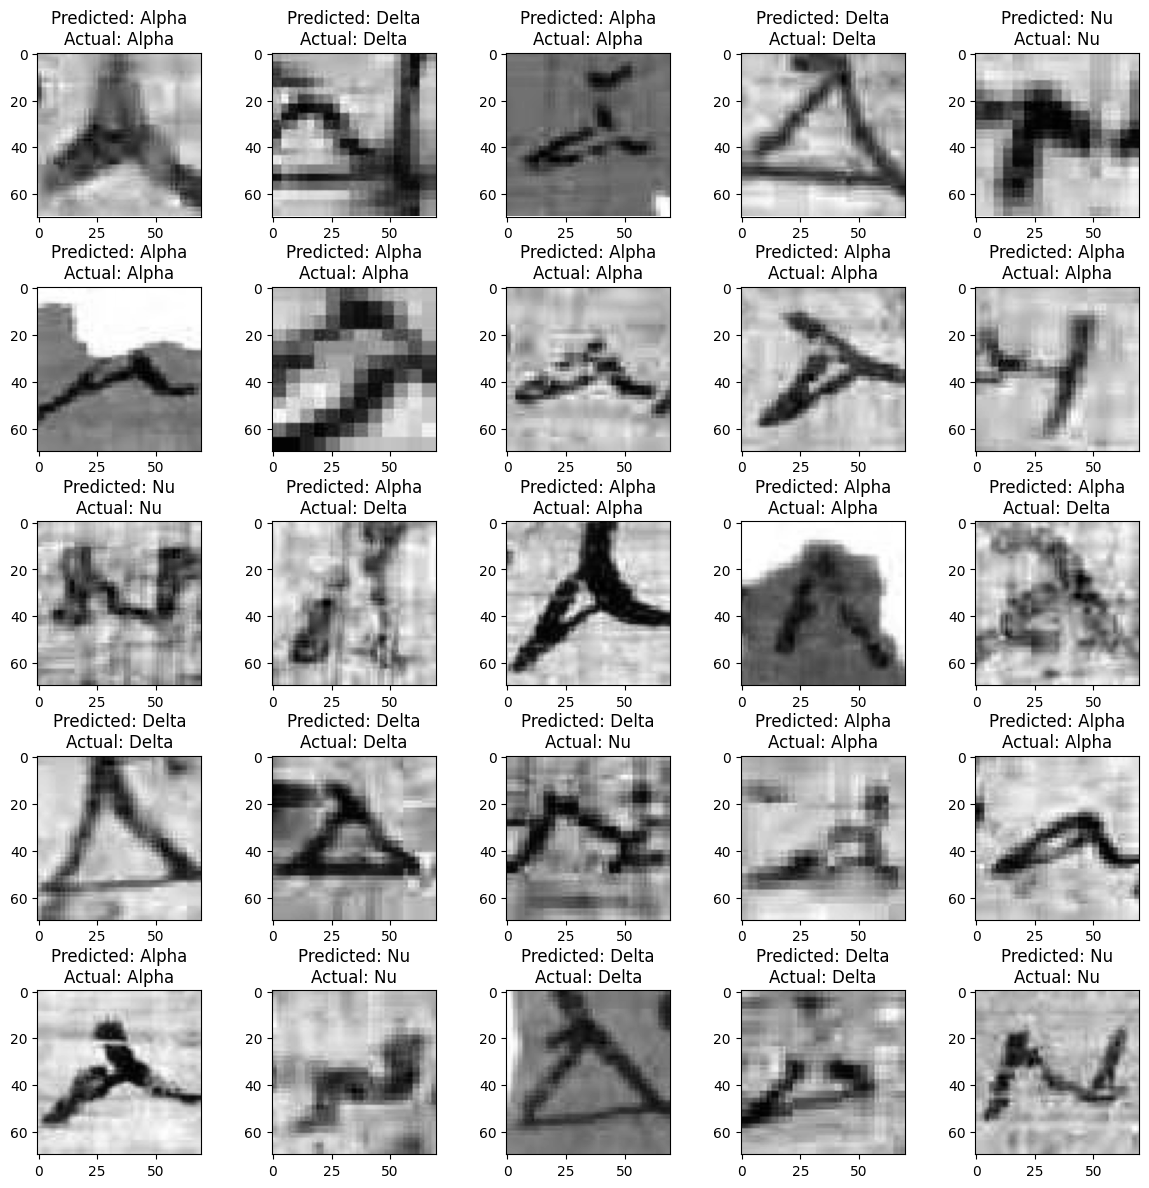

In [ ]:
# this prints out an array of images, with the predicted and actual values

icount = 0
nx = 5
ny = 5

figure, ax = plt.subplots(nx, ny, figsize=(12, 12))
figure.tight_layout(pad=2.0)
xx = model.predict(x_test)
print(ax.shape)
for i in range(nx):
    for j in range(nx):
        img = x_test[icount].reshape(70,70,)
        ax[i][j].imshow(img, cmap='gray')


        # if you just want the actual values, uncomment this line and comment out the next line
#        ax[i][j].set_title("Actual: {}".format(np.argmax(y_test[icount])))
        ax[i][j].set_title("Predicted: {}".format(class_names[np.argmax(xx[icount])]) + "\nActual: {}".format(class_names[np.argmax(y_test[icount])]))
        icount = icount + 1




(5, 5)


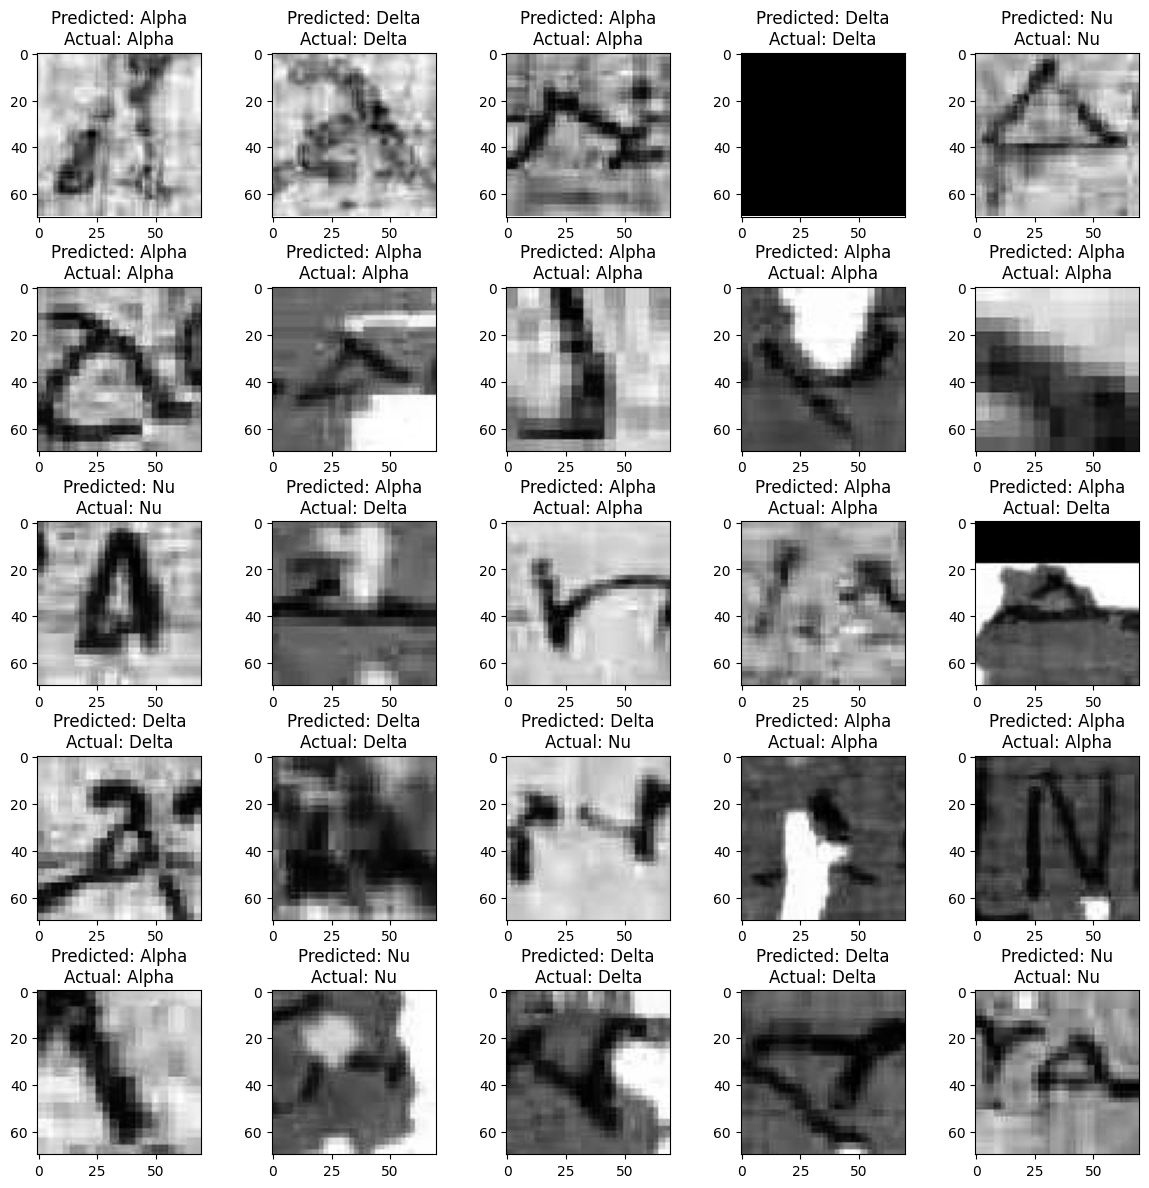

In [ ]:

# this block of also prints out example images, but it only includes them
# misidentified images.
icount = 0
nx = 5
ny = 5
xx = model.predict(x_test)


# make a list of miscategorized images
ilist = []
for i in range(len(xx)):
    if np.argmax(xx[i]) != np.argmax(y_test[i]):
        ilist.append(i)


figure, ax = plt.subplots(nx, ny, figsize=(12, 12))
figure.tight_layout(pad=2.0)

print(ax.shape)
for i in range(nx):
    for j in range(nx):
        ii = ilist[icount]
        img = x_test[ii].reshape(70,70,)
        ax[i][j].imshow(img, cmap='gray')

        ax[i][j].set_title("Predicted: {}".format(class_names[np.argmax(xx[icount])]) + "\nActual: {}".format(class_names[np.argmax(y_test[icount])]))

        icount += 1


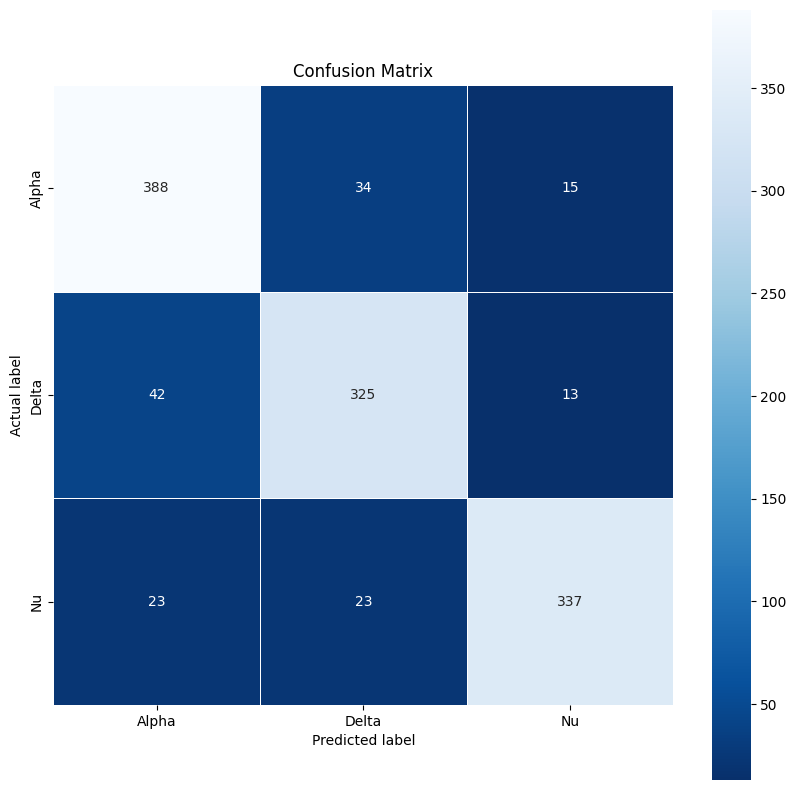

In [ ]:
# create a confusion matrix for the test set
# confusion matrix is a table that is often used to describe the performance of a classification model

def confusion_matrix(y_true, y_pred):
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    n = np.unique(y_true).shape[0]
    cm = np.zeros((n, n))
    for i in range(len(y_true)):
        cm[y_true[i], y_pred[i]] += 1
    return cm

y_true = y_test
y_pred = model.predict(x_test)

die = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(die, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap='Blues_r', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:

die = confusion_matrix(y_true, y_pred)

for i in range(num_classes):
    # diagnol value
    correct = die[i, i]

    # total value for row
    total = sum(die[i, :])

    # accuracy for row
    accuracy = correct / total

    # precision for row
    precision = die[i, i] / sum(die[:, i])

    # recall for row
    recall = die[i, i] / sum(die[i, :])

    # f1 score for row
    f1 = 2 * precision * recall / (precision + recall)

    # confusion matrix for this digit from the precision, recall, accuracy, and f1 score for each digit
    print('\nResults for class %s:\n   Precision=%.2f, Recall=%.2f, Accuracy=%.2f, F1=%.2f' % (class_names[i], precision, recall, accuracy, f1))




Results for class Alpha:
   Precision=0.86, Recall=0.89, Accuracy=0.89, F1=0.87

Results for class Delta:
   Precision=0.85, Recall=0.86, Accuracy=0.86, F1=0.85

Results for class Nu:
   Precision=0.92, Recall=0.88, Accuracy=0.88, F1=0.90
